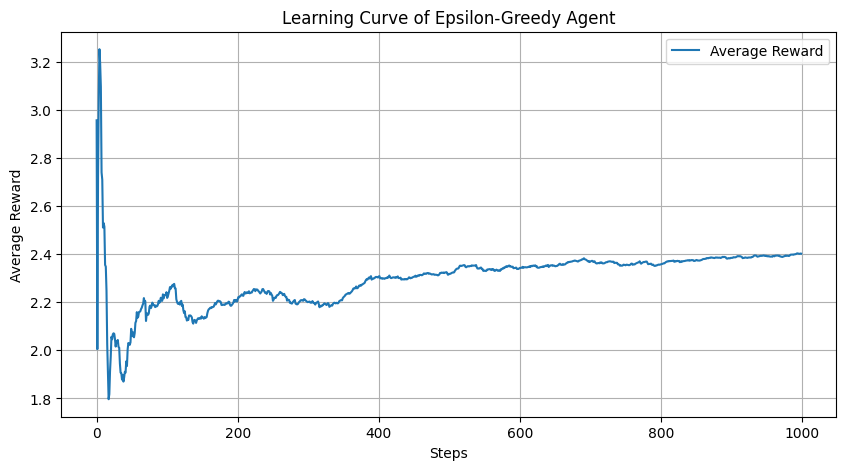

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class EpsilonGreedyAgent:
    def __init__(self, num_actions, epsilon=0.1):
        self.num_actions = num_actions
        self.epsilon = epsilon
        self.action_values = np.zeros(num_actions)
        self.action_counts = np.zeros(num_actions)

    def select_action(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.num_actions)
        else:
            return np.argmax(self.action_values)

    def update_value(self, action, reward):
        self.action_counts[action] += 1
        self.action_values[action] += (
            1 / self.action_counts[action]
        ) * (reward - self.action_values[action])

class MultiArmedBandit:
    def __init__(self, num_arms):
        self.true_action_values = np.random.normal(0, 1, num_arms)

    def get_reward(self, action):
        return np.random.normal(self.true_action_values[action], 1)

# Parameters
num_arms = 50
num_steps = 1000
epsilon = 0.1

agent = EpsilonGreedyAgent(num_arms, epsilon)
bandit = MultiArmedBandit(num_arms)

rewards = []
average_rewards = []

total_reward = 0

# Interaction loop
for step in range(1, num_steps + 1):
    action = agent.select_action()
    reward = bandit.get_reward(action)
    agent.update_value(action, reward)

    total_reward += reward
    rewards.append(reward)
    average_rewards.append(total_reward / step)

# Plot learning curve
plt.figure(figsize=(10, 5))
plt.plot(average_rewards, label="Average Reward")
plt.xlabel("Steps")
plt.ylabel("Average Reward")
plt.title("Learning Curve of Epsilon-Greedy Agent")
plt.legend()
plt.grid(True)
plt.show()
